# Exercise 2

Work on this before the next lecture on 12 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

# Question 1

Build your own random forest classifier! Using the `DecisionTreeClassifier` from scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) construct your own `RandomForestClassifier`.

There are two methods for adding randomisation to the tree growing process:

* grow each tree on a bootstrap sample of the data
* configure each tree to select a subset of features for each split

Try out your new `RandomForestClassifier` on the https://archive.ics.uci.edu/ml/datasets/bank+marketing dataset.

**Note:** To test your classifier it is a good idea to use a smaller dataset like the `make_blobs` from the lecture. It will run much faster and be easier to debug.

* Can you show that a forest of trees that are all the same performs like a single decision tree?
* Can you compute the correlation coefficient between scores assigned by two different trees in the forest? In order to gain from buildign a forest you want your trees to not be 100% correlated. Experiment with the different randomisation strategies to check that they work.

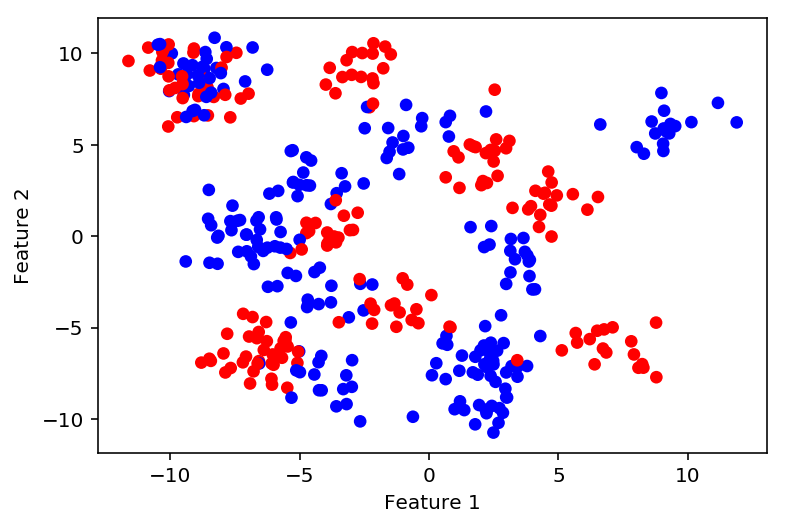

In [3]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

labels = ['b', 'r']
#X, y = make_moons(n_samples=400, noise=0.2, random_state=42)
#y = np.take([0, 1], (y < 1))
#y_label = np.take(labels, (y < 1))
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

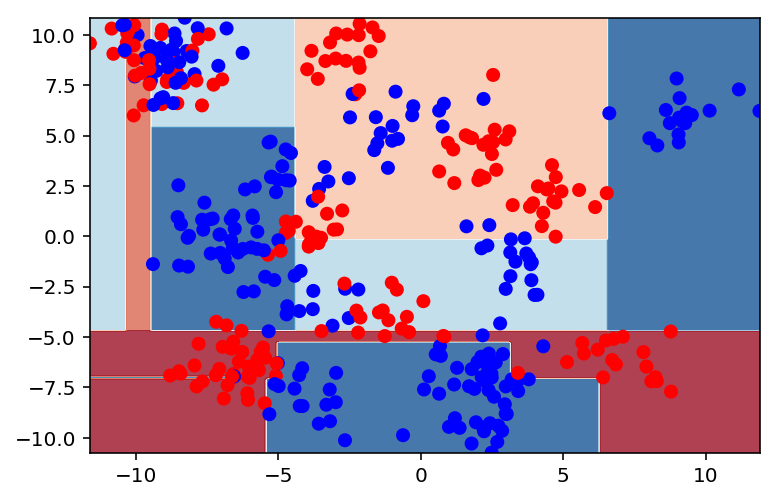

In [4]:
# Single tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from utils import plot_surface

X_train, X_test, y_train, y_test = train_test_split(X, y)
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
plot_surface(dtc, X, y)
#print(dtc.predict_proba(X_test)[0],dtc.predict(X_test)[0])
#print(dtc.classes_)

In [5]:
# Make forrest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

class CustomRandomForrestClassifier:
    def __init__(self, n=10, max_depth=5, bootstrapping=True, featuresubset=False):
        self.max_depth = max_depth
        self.n = n
        self.trees = []
        self.bootstrapping = bool(bootstrapping)
        self.featuresubset = bool(featuresubset)
        
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for i in range(self.n):
            treeops = dict(max_depth=self.max_depth)
            if self.featuresubset:
                treeops['max_features'] = 0.3
            dtc = DecisionTreeClassifier(**treeops)
            X_rand, y_rand = self.bootstrap(X, y)
            dtc.fit(X_rand, y_rand)
            self.trees.append(dtc)
            
    def predict_proba(self, X):
        full_dat = [tree.predict(X) for tree in self.trees]
        full_dat = np.array(full_dat).transpose()
        probs = np.zeros((len(X), len(self.classes_)))
        for i, sample in enumerate(full_dat):
            for j, cl in enumerate(self.classes_):
                probs[i,j] = np.count_nonzero(sample == cl) / self.n
        return probs
    
    def predict(self, X):
        probs = self.predict_proba(X)
        prediction = []
        for prs in probs:
            prediction.append(self.classes_[prs.argmax()])
        return prediction
        
    def score(self, X, y):
        pred = self.predict(X)
        score = 0.
        for pp, yy in zip(pred, y):
            if pp==yy: score+=1
        score = score/len(pred)
        return score
        
    def bootstrap(self, X, y):
        if self.bootstrapping:
            X_rand, y_rand = resample(X, y)
        else:
            X_rand, y_rand = X, y
        return X_rand, y_rand

In [6]:
test = CustomRandomForrestClassifier()
test.fit([[1],[2]], ['a', 'b'])
print(
    test.predict_proba([[1], [3], [2]]),
    test.predict([[1], [3], [2]])
)
print(test.score([[1], [3], [2]], ['a', 'a', 'b']))

[[0.8 0.2]
 [0.1 0.9]
 [0.1 0.9]] ['a', 'b', 'b']
0.6666666666666666


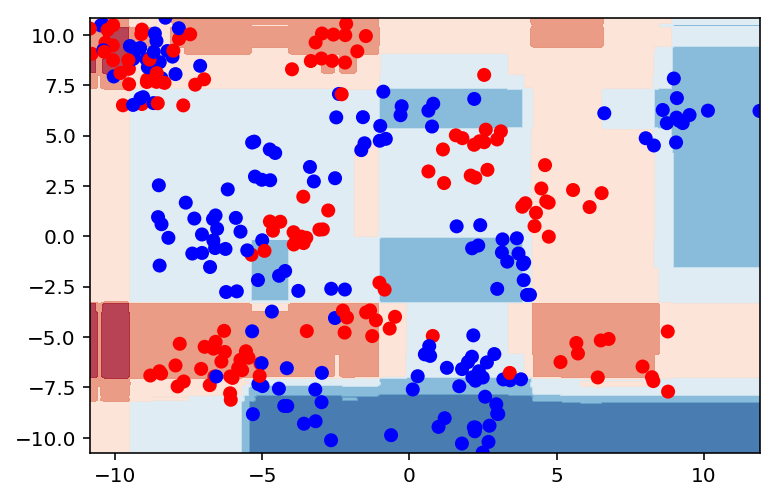

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
crfc = CustomRandomForrestClassifier(n=30, max_depth=3, bootstrapping=True, featuresubset=True)
crfc.fit(X_train, y_train)
plot_surface(crfc, X_train, y_train)

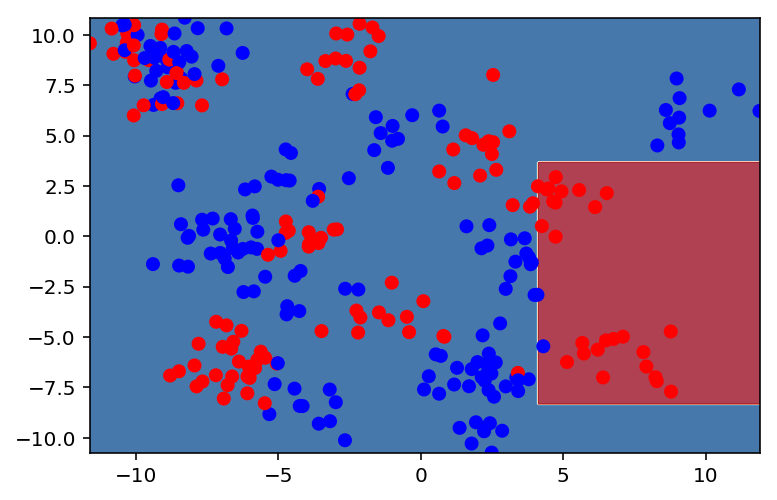

In [8]:
# When all the trees are the same, then the forrest acts as a single tree
X_train, X_test, y_train, y_test = train_test_split(X, y)
crfc = CustomRandomForrestClassifier(n=30, max_depth=3, bootstrapping=False, featuresubset=False)
crfc.fit(X_train, y_train)
plot_surface(crfc, X_train, y_train)

In [9]:
# Real data

import pandas as pd

# you might have to adjust the path to the dataset
bank_data = pd.read_csv("data/bank-additional/bank-additional-full.csv",  sep=';')

del bank_data['duration']

X = bank_data.as_matrix()[:, :-1]
y = bank_data.as_matrix()[:,-1]

print(X[0:5])

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y)
#
#dtc = DecisionTreeClassifier(max_depth=5)
#dtc.fit(X_train, y_train)
#print(clf.score(X_train, y_train), clf.score(X_train, y_train))
#
#crfc = CustomRandomForrestClassifier(n=30, max_depth=5, bootstrapping=True, featuresubset=True)
#crfc.fit(X_train, y_train)
#
#tr_sc = crfc.score(X_train, y_train)
#te_sc = crfc.score(X_test, y_test)
#print(tr_sc, te_sc)

[[56 'housemaid' 'married' 'basic.4y' 'no' 'no' 'no' 'telephone' 'may'
  'mon' 1 999 0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]
 [57 'services' 'married' 'high.school' 'unknown' 'no' 'no' 'telephone'
  'may' 'mon' 1 999 0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]
 [37 'services' 'married' 'high.school' 'no' 'yes' 'no' 'telephone' 'may'
  'mon' 1 999 0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]
 [40 'admin.' 'married' 'basic.6y' 'no' 'no' 'no' 'telephone' 'may' 'mon'
  1 999 0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]
 [56 'services' 'married' 'high.school' 'no' 'no' 'yes' 'telephone' 'may'
  'mon' 1 999 0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]]


In [10]:
print((bank_data.columns))

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [11]:
# Testing encoding of data

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()

i=3
print(
    X[0:4,i])
print(
    lb.fit_transform(X[0:4,i]),
    le.fit_transform(X[0:4,i])
)

['basic.4y' 'high.school' 'high.school' 'basic.6y']
[[1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]] [0 2 2 1]


In [12]:
# Conversion of pandas data using sklearn-pandas
from sklearn_pandas import DataFrameMapper
from sklearn import preprocessing

mapper = DataFrameMapper([
    ('age', None),
    ('job', preprocessing.LabelBinarizer()),
    ('marital', preprocessing.LabelBinarizer()),
    ('education', preprocessing.LabelBinarizer()),
    ('default', preprocessing.LabelBinarizer()),
    ('housing', preprocessing.LabelBinarizer()),
    ('loan', preprocessing.LabelBinarizer()),
    ('contact', preprocessing.LabelBinarizer()),
    ('month', preprocessing.LabelBinarizer()),
    ('day_of_week', preprocessing.LabelBinarizer()),
    ('campaign', preprocessing.LabelBinarizer()),
    ('pdays', None),
    ('previous', None),
    ('poutcome', preprocessing.LabelBinarizer()),
    ('emp.var.rate', None),
    ('cons.price.idx', None),
    ('cons.conf.idx', None),
    ('euribor3m', None),
    ('nr.employed', None),
])

X_transf = mapper.fit_transform(bank_data.copy())
print(X_transf[0])

[ 5.6000e+01  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0

In [13]:
from sklearn.pipeline import Pipeline

Model = Pipeline([
    ('featurize', mapper),
    ('forrest', CustomRandomForrestClassifier()),
])

# Split between train and test data
msk = np.random.rand(len(bank_data)) < 0.8

bank_train = bank_data[msk]
bank_test = bank_data[~msk]

Model.fit(bank_train, bank_train.y)

print(
    Model.score(bank_train, bank_train.y),
    Model.score(bank_test, bank_test.y)
)


0.9029426948890036 0.9010776123017314


# Question 2

Use the ready made `RandomForestClassifier` from scikit-learn to create the best model you can for the Bank Marketing dataset. Use `GridSearchCV` (or any other method) to tune your model and possible pre-processing steps. Make sure you have a test set to use after you are done tuning to estimate your generalisation error.

In [78]:
# Choose split for testing
# Split between train and test data
msk = np.random.rand(len(bank_data)) < 0.8


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# try get_dummies instead
features_df = pd.get_dummies(bank_data.drop(columns='y'))
bank_train = features_df[msk]
bank_test = features_df[~msk]
outcome_train = bank_data['y'][msk]
outcome_test = bank_data['y'][~msk]

#bank_train = bank_data[msk]
#bank_test = bank_data[~msk]

Model = Pipeline([
    #('featurize', mapper),
    ('forest', RandomForestClassifier()),
])

param_grid = {
    'forest__n_estimators': [100],
    #'forest__n_estimators': [20],
    'forest__criterion': ['gini', 'entropy'],
    #'forest__max_depth': [2],
    'forest__max_depth': [1,2,3],
}

gs = GridSearchCV(Model, param_grid, cv=4, return_train_score=True)
gs.fit(bank_train, outcome_train)
pass

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


0.890424125916136


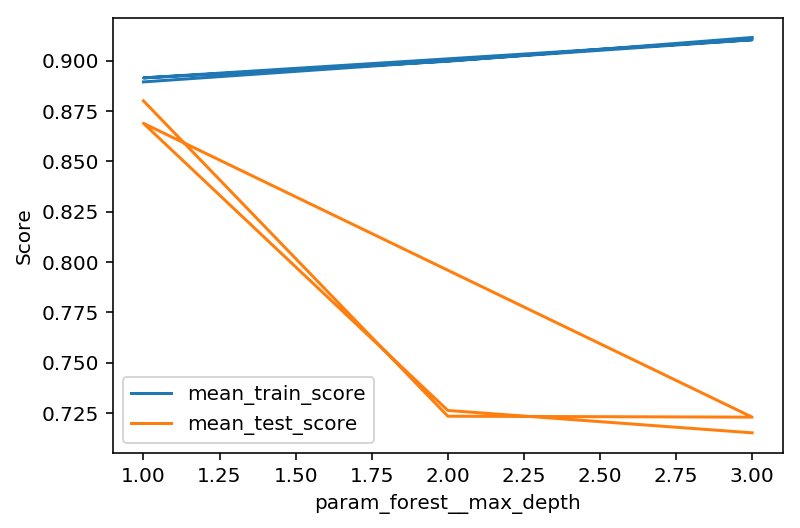

In [93]:
# plot scores
scores = pd.DataFrame(gs.cv_results_)
scores.plot(
            #x='param_forest__n_estimators',
            x='param_forest__max_depth',
            y=['mean_train_score', 'mean_test_score'],
            kind='line',
           )
plt.legend(loc='best')
plt.ylabel('Score');
#plt.savefig("../../images/dt_max_leaf_nodes_cv.png")

#print(gs.best_estimator_)
print(gs.best_estimator_.score(bank_test, outcome_test))

# Question 3

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the california housing dataset. You might have to tune `n_estimators` and other hyper-parameters to get good performance.

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [3]:
# Import data
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

cal_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n 

Text(0,0.5,'price')

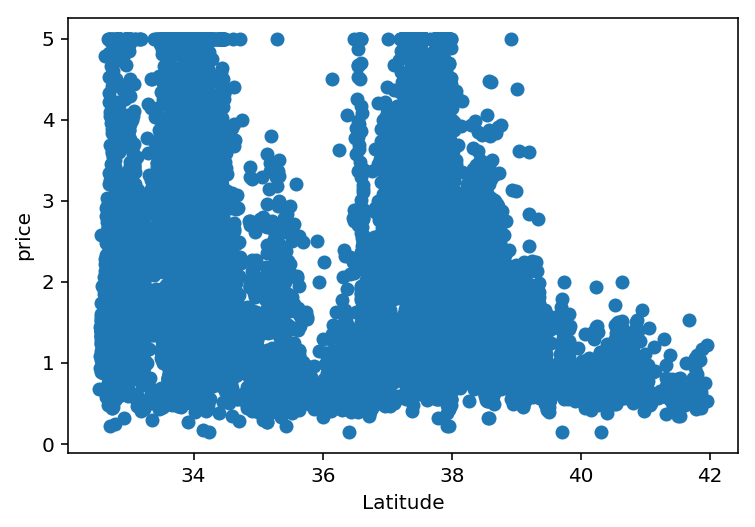

In [4]:
# plot features

feat = 6

plt.scatter( cal_housing['data'][:,feat], cal_housing['target'])
plt.xlabel(cal_housing['feature_names'][feat])
plt.ylabel('price')

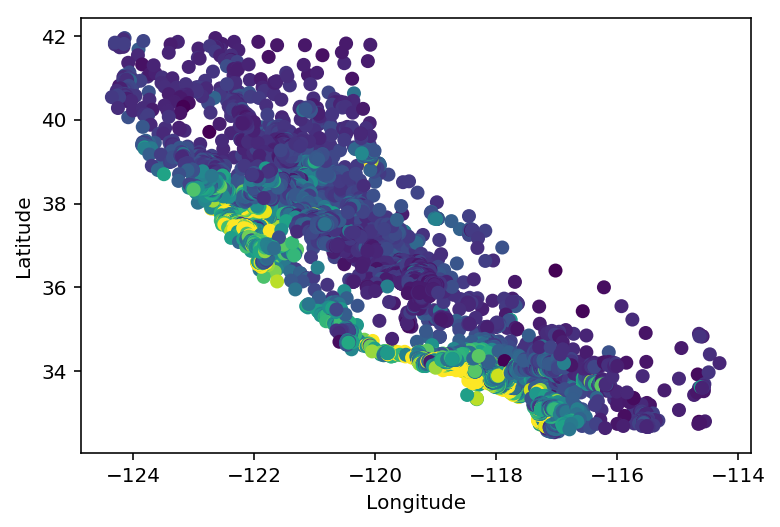

In [5]:
# Plot two features
feats = [7,6] # map of California


plt.scatter( 
            cal_housing['data'][:,feats[0]], 
            cal_housing['data'][:,feats[1]], 
            c=cal_housing['target'],
)
plt.xlabel(cal_housing['feature_names'][feats[0]])
plt.ylabel(cal_housing['feature_names'][feats[1]])
pass


(array([3596.,    0., 8289.,    0., 4889.,    0., 2095.,    0.,  779.,
         992.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

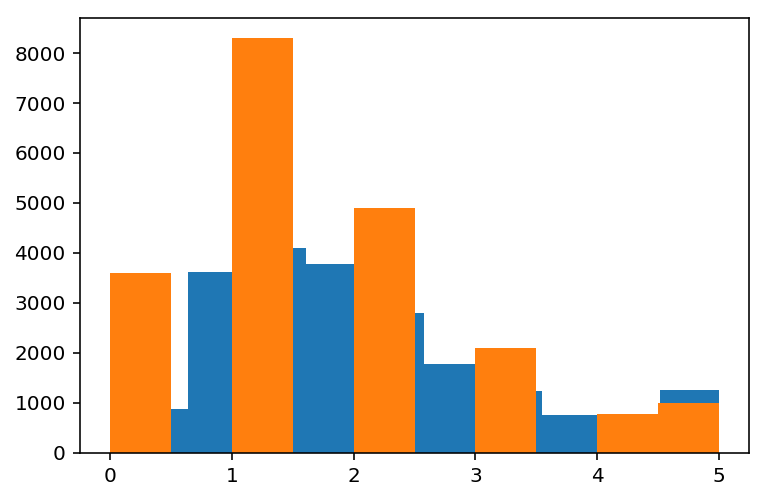

In [6]:
# Need to convert float target to classes

plt.hist(cal_housing['target'], bins=10)


pass


plt.hist(0.5*(2*cal_housing['target'].astype(int)), bins=10)

In [ ]:
# Fit RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [20, 30, 50],
    'max_depth': [1,3,5]
}

gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=4, return_train_score=True)
gs.fit(cal_housing['data'], (cal_housing['target']).astype(int))

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


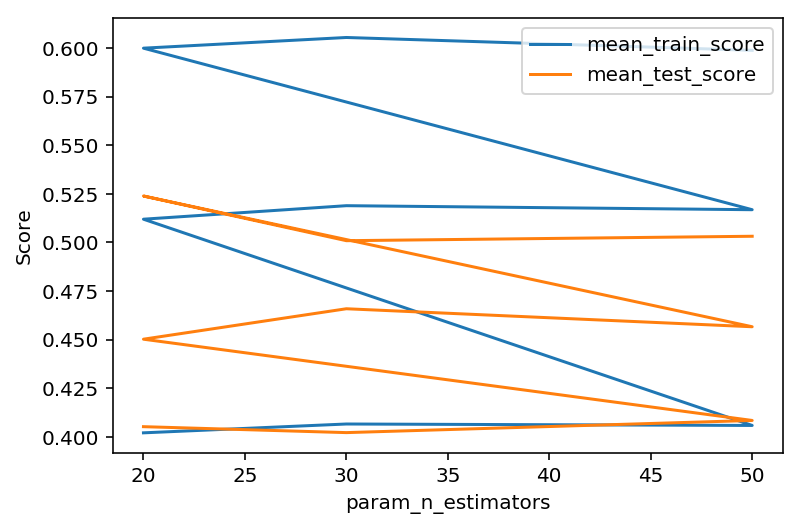

In [13]:
import pandas as pd
# plot scores
scores = pd.DataFrame(gs.cv_results_)
scores.plot(
            x='param_n_estimators',
            y=['mean_train_score', 'mean_test_score'],
            kind='line',
           )
plt.legend(loc='best')
plt.ylabel('Score');

print(gs.best_estimator_)

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


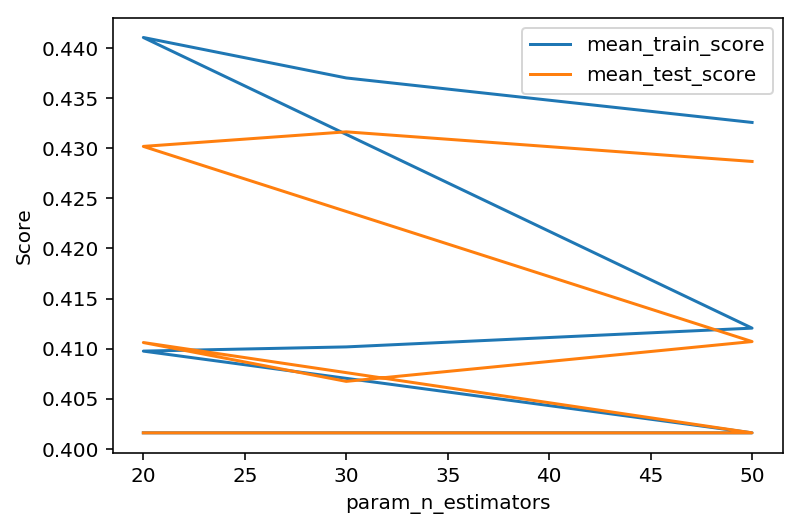

In [16]:
# Fit ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [20, 30, 50],
    'max_depth': [1,3,5]
}

gs = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=4, return_train_score=True)
gs.fit(cal_housing['data'], (cal_housing['target']).astype(int))

# plot scores
scores = pd.DataFrame(gs.cv_results_)
scores.plot(
            x='param_n_estimators',
            y=['mean_train_score', 'mean_test_score'],
            kind='line',
           )
plt.legend(loc='best')
plt.ylabel('Score');

print(gs.best_estimator_)

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


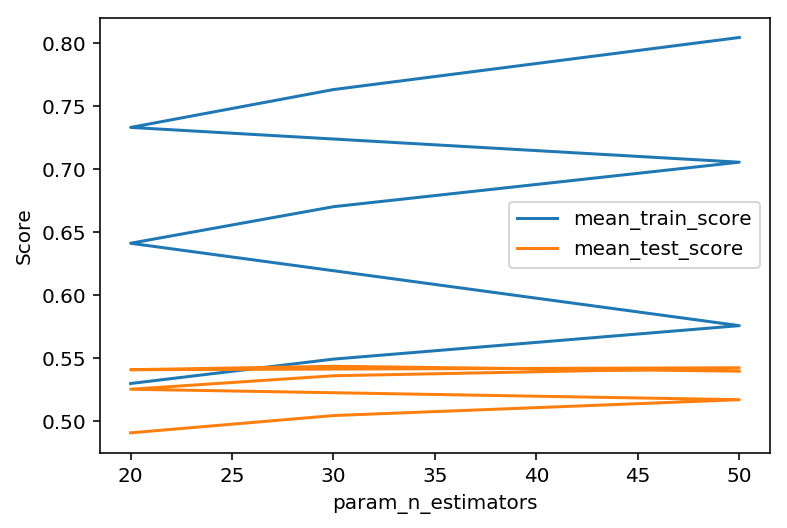

In [25]:
# Fit GradientBoostedTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [20, 30, 50],
    'max_depth': [1,3,5]
}

gs = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=4, return_train_score=True)
gs.fit(cal_housing['data'], (cal_housing['target']).astype(int))

# plot scores
scores = pd.DataFrame(gs.cv_results_)
scores.plot(
            x='param_n_estimators',
            y=['mean_train_score', 'mean_test_score'],
            kind='line',
           )
plt.legend(loc='best')
plt.ylabel('Score');

print(gs.best_estimator_)

In [19]:
gs.best_estimator_.classes_

array([0, 1, 2, 3, 4, 5])

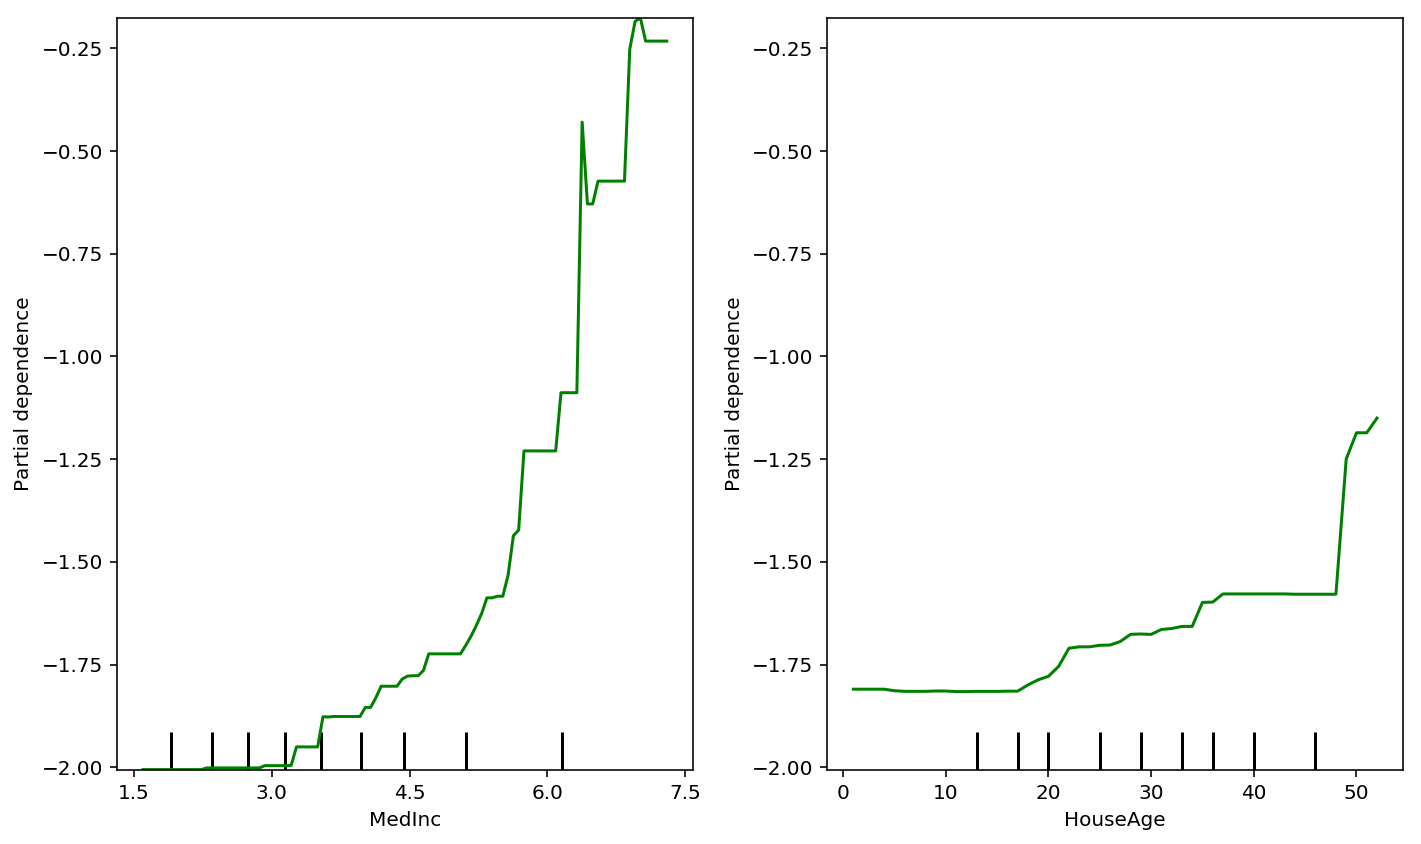

In [27]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

plot_partial_dependence(gs.best_estimator_, cal_housing['data'], 
                        features=[0, 1], feature_names=cal_housing['feature_names'],
                        figsize=(10,6), n_cols=2, label=5);
plt.tight_layout();

# Question 4

Competition time! Use any model you want (and understand) to make the best model you can to predict the target in the below dataset.

Each student's submission will be ranked by:
* their performance (using [AUC ROC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) as metric) and
* how well they did at predicting their generalisation error.

Your final rank will be the average of your two ranks.

To evaluate how good you did at predicting your generalisation error Tim will release a fresh test data set after the hand-in deadline. You can then re-run your trained classifier on that data and score its performance. We will rank students by the difference between that score and their predicted score.

You can read in the data using the `pandas` library. The final column of the file contains the target (zero or one).

In [35]:
import pandas as pd

# you might have to adjust the path to the dataset
df_train = pd.read_csv("advanced-computing-2018/data/challenge-train.csv", header=None)
df_train = df_train.drop(columns=[46])
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,47,48
0,0.000576,0.999939,12.769232,0.584357,0.136273,13.359463,3.358099,14655.587891,0.005370,0.041032,...,376.700348,58935.695312,74241.648438,4598.116699,2.897916,2.932629,3.193417,267,0.381424,0
1,0.001807,0.999996,18.585171,0.368892,0.054991,3.600483,6.781577,4145.290527,0.030382,0.034570,...,2028.605591,20553.839844,12501.964844,28162.607422,3.584545,3.010242,3.322494,128,0.781520,1
2,0.000858,0.999304,4.794842,0.149876,0.172385,16.130068,3.723242,4936.734375,0.017344,0.027622,...,2874.089600,7566.020020,11801.971680,16086.186523,2.700943,2.920070,2.407294,254,0.508650,0
3,0.001519,0.999969,15.656528,0.312301,0.125831,8.113082,5.763765,4948.376465,0.035185,0.038973,...,1488.869995,19161.880859,18598.472656,17658.548828,3.108439,2.932674,3.164568,531,0.682114,0
4,0.000936,0.999978,8.998086,0.475861,0.065347,3.863127,3.675261,4757.155762,0.022795,0.046165,...,342.455688,12651.365234,33099.660156,10722.979492,2.873017,3.074762,4.136894,160,0.633693,1


In [36]:
# convert the pandas dataframe to a numpy array
# make sure you do not include the final column
# in your training data (X) but store it as target (y)
X = df_train.as_matrix()[:, :-1]
y = df_train.as_matrix()[:, -1]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
param_grid = {
    'n_estimators': [20, 30, 50, 80],
    'max_depth': [1,3,5]
}

gs = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=4, return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30, 50, 80], 'max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
estim = gs.best_estimator_.score(X_test, y_test)
print('Unbiased estimation = {}'.format(estim))

Unbiased estimation = 0.9051555555555556


Sorry but due to general lack of time and wasting too much time on previous questions, I did not have time for a more sophisticated optimization.